# Tensorflow를 이용한 로지스틱회귀분석

## 1) Tensorflow 사용하지 않기

epoch=0, 기울기=99.6571, 절편=9.9143  Cost=1.7354
epoch=100, 기울기=65.3714, 절편=1.3429  Cost=1.7354
epoch=200, 기울기=31.0857, 절편=-7.2286  Cost=1.7354
epoch=300, 기울기=2.0650, 절편=-14.2327  Cost=1.7494
epoch=400, 기울기=2.0706, 절편=-14.3300  Cost=1.7501
epoch=500, 기울기=2.0841, 절편=-14.4248  Cost=1.7499
epoch=600, 기울기=2.0974, 절편=-14.5183  Cost=1.7498
epoch=700, 기울기=2.1105, 절편=-14.6106  Cost=1.7496
epoch=800, 기울기=2.1235, 절편=-14.7017  Cost=1.7494
epoch=900, 기울기=2.1363, 절편=-14.7917  Cost=1.7492
epoch=1000, 기울기=2.1489, 절편=-14.8805  Cost=1.7491


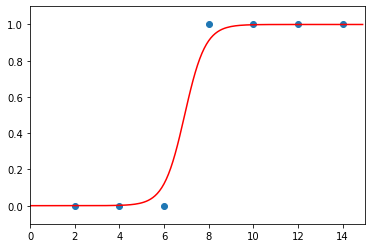

In [ ]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : (1) numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 100, 10  # 기울기, 절편
lr = 0.1        # 학습률

#시그모이드 함수를 정의합니다.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    return - (Y * np.log(sigmoid(a * X + b)) +(1 - Y) * np.log(1 - sigmoid(X))).mean()

#경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수

    a = a - lr * a_diff     # 실수
    b = b - lr * b_diff     # 실수
    if i % 100 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, a, b, cost(a, b)))

# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(a * x_range + b),"r")
plt.show()

## 2) Tensorflow version 1

Epoch: 0, loss 0.8233, slope a = -0.0134, y intercept b = -0.5799
Epoch: 200, loss 0.2661, slope a = 0.4330, y intercept b = -2.5106
Epoch: 400, loss 0.2004, slope a = 0.5790, y intercept b = -3.6401
Epoch: 600, loss 0.1672, slope a = 0.6861, y intercept b = -4.4452
Epoch: 800, loss 0.1466, slope a = 0.7719, y intercept b = -5.0810
Epoch: 1000, loss 0.1321, slope a = 0.8444, y intercept b = -5.6130
Epoch: 1200, loss 0.1213, slope a = 0.9078, y intercept b = -6.0745
Epoch: 1400, loss 0.1127, slope a = 0.9644, y intercept b = -6.4846
Epoch: 1600, loss 0.1057, slope a = 1.0158, y intercept b = -6.8557
Epoch: 1800, loss 0.0998, slope a = 1.0631, y intercept b = -7.1959
Epoch: 2000, loss 0.0947, slope a = 1.1070, y intercept b = -7.5109
Epoch: 2200, loss 0.0903, slope a = 1.1480, y intercept b = -7.8051
Epoch: 2400, loss 0.0864, slope a = 1.1867, y intercept b = -8.0815
Epoch: 2600, loss 0.0829, slope a = 1.2233, y intercept b = -8.3427
Epoch: 2800, loss 0.0798, slope a = 1.2581, y intercep

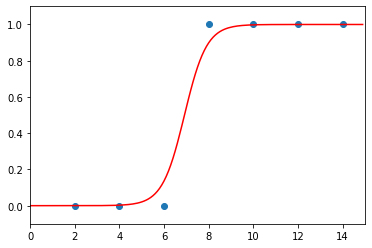

In [ ]:
##########################################################
# 이진 분류(Activation: sigmoid, Loss:binary_crossentropy)
##########################################################
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()                    # not using tenserflow 2.x version
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트
data = np.array([[2, 0],
                 [4, 0],
                 [6, 0],
                 [8, 1],
                 [10, 1],
                 [12, 1],
                 [14, 1]])
X = data[:, 0]
Y = data[:, 1]

# a와 b의 초기값
a = tf.Variable(tf.random_normal([], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([], dtype=tf.float64, seed=0))

# Activation function
hypothesis = 1 / (1 + tf.exp(-(a * X + b)))

# Loss function
loss = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# Settings
epochs = 10000
learning_rate = 0.1

# optimization method : Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Learning
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())         # Variable tensor 초기화

    for i in range(epochs + 1):
        sess.run(optimizer)
        if i % 200 == 0:
            print('Epoch: %.f, loss %.4f, slope a = %.4f, y intercept b = %.4f' %
                  (i, sess.run(loss), sess.run(a), sess.run(b)))

    # with tf.Session() as sess:
    last_a = sess.run(a)
    last_b = sess.run(b)

# Plot
plt.scatter(X, Y)
plt.xlim(0, 15)
plt.ylim(-0.1, 1.1)

x_range = (np.arange(0, 15, 0.1))
plt.plot(x_range, 1/(1 + np.exp(-(last_a * x_range + last_b))), 'r')
plt.show()

## 3) Tensorflow version 2
##### ※ 주의! <br>
위에서 tensorflow version 1만 사용하도록 option을 지정했었기 때문에 런타임 재시작 후 실행해야 한다.

Epoch: 0,	 loss = 1.4207,	 accuracy = 0.4286,	slope a = -0.0928,	 y intercept b = -1.2233
Epoch: 200,	 loss = 0.1117,	 accuracy = 1.0000,	slope a = 0.9716,	 y intercept b = -6.5375
Epoch: 400,	 loss = 0.0859,	 accuracy = 1.0000,	slope a = 1.1920,	 y intercept b = -8.1190
Epoch: 600,	 loss = 0.0716,	 accuracy = 1.0000,	slope a = 1.3578,	 y intercept b = -9.2997


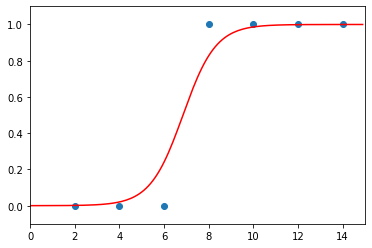

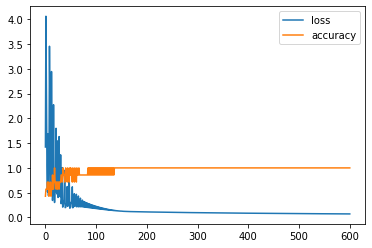

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트
data = np.array([[2, 0],
                 [4, 0],
                 [6, 0],
                 [8, 1],
                 [10, 1],
                 [12, 1],
                 [14, 1]])
X = data[:, 0]
Y = data[:, 1]

# a와 b의 초기값 (v1: tf.random_normal, v2: tf.random.normal)
a = tf.Variable(tf.random.normal([], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.normal([], dtype=tf.float64, seed=0))

# Activation function
def hypothesis(a, b):
    return 1 / (1 + tf.exp(-(a * X + b)))

# Loss function
def cost(*args):        # function 용도
    return -tf.reduce_mean(Y * tf.math.log(hypothesis(a, b))
                           + (1 - Y) * tf.math.log(1 - hypothesis(a, b)))

# Optimization method : Gradient Descent
opt = tf.keras.optimizers.SGD(learning_rate=0.5)
history = {'loss':[], 'accuracy':[]}
for i in range(601):
    opt.minimize(cost, var_list=[a, b])     # cost를 minimize하도록 a와 b를 변경
    accuracy = (((hypothesis(a, b).numpy() > 0.5) * 1) == Y).mean()
    history['loss'].append(cost(a,b).numpy())
    history['accuracy'].append(accuracy)
    if i % 200 == 0:
        print('Epoch: %.f,\t loss = %.4f,\t accuracy = %.4f,\tslope a = %.4f,\t y intercept b = %.4f' %
              (i, cost(a, b), accuracy, a.numpy(), b.numpy()))

# Plot
plt.scatter(X, Y)
plt.xlim(0, 15)
plt.ylim(-0.1, 1.1)

x_range = (np.arange(0, 15, 0.1))
plt.plot(x_range, 1/(1 + np.exp(-(a.numpy() * x_range + b.numpy()))), 'r')
plt.show()

# Plot
import pandas as pd
df_history = pd.DataFrame(history)
df_history.plot()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Tensorflow를 이용한 다중로지스틱회귀분석

## 1) Tensorflow version 1

In [ ]:
##########################################################
# 다중 분류(Activation: softmax, Loss:binary_crossentropy)
##########################################################
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()                    # not using tenserflow 2.x version
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)

# x, y의 데이터 값
X = np.array([[2, 3],[4, 3],[6, 4],[8, 6],[10, 7],[12, 8],[14, 9]], dtype=np.float32)  # shape=(7, 2)
Y = np.array([0, 0, 0, 1, 1, 1, 1], dtype=np.float32).reshape(7, 1)   # shape=(7,1)
# Y = to_categorical(Y)

# a와 b의 초기값
W = tf.Variable(tf.random_normal([2, 1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([2], dtype=tf.float64, seed=0))

# Activation function
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Loss function
loss = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis), axis=1)

# Settings
epochs = 10000
learning_rate = 0.1

# optimization method : Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Learning
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())         # Variable tensor 초기화

    for i in range(epochs + 1):
        sess.run(optimizer)
        if i % 200 == 0:
            print('Epoch: %.f, loss %.4f' % (i, sess.run(loss))

    # with tf.Session() as sess:
    # last_w = sess.run(w)
    # last_b = sess.run(b)



SyntaxError: ignored

In [ ]:
from tensorflow.keras.utils import to_categorical
Y = np.array([0, 0, 0, 1, 1, 1, 1], dtype=np.float32).reshape(7, 1)   # shape=(7,1)
Y= to_categorical(Y)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)